# Tutorial de Ciencia de Datos (UdeSA) 2025
## Tutorial 8 
### Clasificacion: Logit, KNN y Metricas de Precisión


**Objetivo:** entender la "diferencia" entre clasificación y regresión. Utilizar logit y KNN. Análisis de la curva ROC.

Veremos:
- Clasificación
- Medidas de precisión
- Curva de ROC
- Logit
- KNN
- Naive Bayes



In [107]:
import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

#### Nueva situación: 'y' es una variable cualitativa. ¿Qué hacer? 

- ¿Por qué en el caso de 'y' cualitativa la regresión linear no es una opción apropiada?

1. Puede no haber una forma de transformar una variable cualitativa con más de 2 niveles en una variable cuantitaiva que nos 'sirva' para una regresión lineal: puede que 'y' no tenga un orden. Por ejemplo, si la 'y' hace referencia a enfermedades. ¿Cómo asignarles un valor? Implicaría asumir un orden y también que la diferencia entre las enfermedades es equivalente...

2. En el caso binario (2 niveles) podemos transformar la variable a una variable numérica. Por ejemplo: y=1 pobre e y=0 no pobre. Sin embargo, con una regresión  lineal podría ocurrir que generemos predicciones fuera del intervalo [0, 1] y por ende no podremos interpretarlo como probabilidades...

Entonces...
#### Vamos a clasificar 'y' (variable cualitativa) en base a 'x'

- ¿Estamos ante un caso de aprendizaje supervisado o no supervisado? 

Vamos a trabajar con bases donde tenemos el output esperado. Por lo tanto, nuestros modelos serán casos de aprendizaje supervisado.
     
- ¿Qué es el clasificador de Bayes? 

Clasificar según el estado más probable minimiza el riesgo esperado. Por ej: si la probabilidad de que una persona me pague un credito es mayor que 0.5, predigo que pagará el credito. 

#### Modelos:
    
1. Regresión logística 
2. Análisis de discriminante lineal
3. KNN

Vamos a construir un clasificador con los datos de training. Queremos que funcione bien no solo en el conjunto de entrenamiento sino también en el conjunto de test.

#### REGRESIÓN LOGÍSTICA CON SCIKIT-LEARN

Algoritmo de clasificación que se usa para predecir la probabilidad de una variable dependiente categórica. El modelo logit predice $P(Y=1)$ como una función de $X$. Se modela la probabilidad de una forma tal que los outputs serán valores entre 0 y 1 para cualquier valor de $X$.


Ahora utilizaremos la función [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Se pueden proveer muchos parámetros opcionales para esta función:

- **fit_intercept**: Boolean que decide si calcular el intercepto (True) o considerarlo igual a cero (False). Por default es True.
- **penalty**: Se determina se usar algún tipo de regularización. Posibles valores: ‘l1’, ‘l2’, ‘elasticnet’, None. El valor por defecto es default es ‘l2’, es decir que se aplica regularización.


In [108]:
# Creamos un vector de x e y para fines del ejemplo.
np.random.seed(25)
X = np.random.normal(size=100)
print(X)

# Recordatorio: para la regresión lineal creamos un vector aleatorio así:
# y = 2 + 3*x + np.random.rand(50, 1)
# Ahora lo crearemos de la siguiente forma para que tenga más sentido usar una regresión logística
y = (X > 0).astype(float) # si no pusiera astype sería un array de True y False

# Alteramos los valores de X y sumamos variación con el "error"
X[X > 0] *= 4
X += .5 * np.random.normal(size=100)
X = X.reshape((-1, 1)) # para tenerlo como columna
#print(X)

[ 0.22827309  1.0268903  -0.83958485 -0.59118152 -0.9568883  -0.22232569
 -0.61991511  1.83790458 -2.05323076  0.86858305 -0.92073444 -0.23231186
  2.1529569  -1.33466147  0.07637965 -1.24608928  1.20227231 -1.04994158
  1.05661011 -0.41967767  2.29484234 -2.59448738  2.8227564   0.68088892
 -1.57769345 -1.97625359  0.53333982 -0.29086971 -0.51351967  1.98262608
  0.22600105 -1.83990496  1.60767083  0.38829194  0.39973206  0.4054766
  0.21700177 -0.6334391   0.24662153 -1.93954552  0.11405963 -1.8853414
  0.24308048 -0.70548067  0.36462762 -0.50295216 -0.22575155 -0.56553773
  0.10339501  2.01840842  1.09424827  1.6624344  -0.62745348  1.62119964
  1.17813267 -0.37487875 -0.54432898  0.28776118 -0.20581999  1.18998786
  0.72892688 -0.22204012 -1.62270578  0.31254055 -1.16042141  0.31355968
  0.47199786  0.57786171  0.50540675 -0.62648777 -0.34636933 -2.06594183
  0.76893629  1.12886631  0.16692354 -0.96725539  0.49199625 -0.55085717
 -0.08469407  1.96756834 -0.06267511 -0.85113578  0.4

Text(0, 0.5, 'Y')

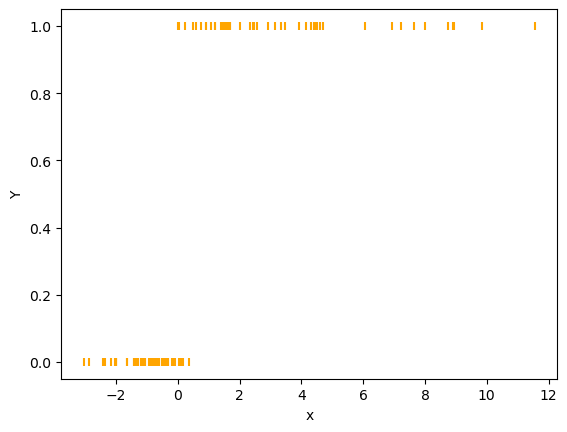

In [109]:
# Graficamos para ver si nos quedó un vector que 1s y 0s
plt.scatter(X, y, color='orange', zorder=20, marker="|")
plt.xlabel('x')
plt.ylabel('Y')

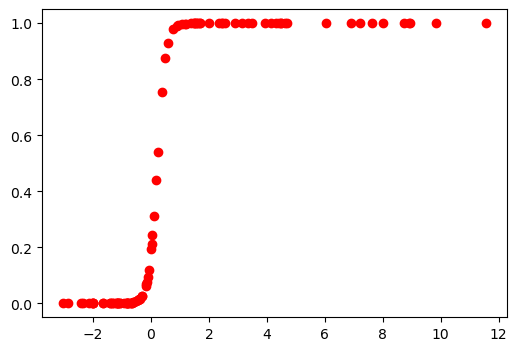

In [110]:
# Ajustamos el clasificador con el método fit() 
log_reg = LogisticRegression(penalty=None).fit(X, y)

# Predicciones (probabilidad)
y_pred_score = log_reg.predict_proba(X)[:,1]   # Por qué seleccionamos la columna 1?

# Gráfico de resultados
plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred_score, color='red', zorder=20)
plt.show()

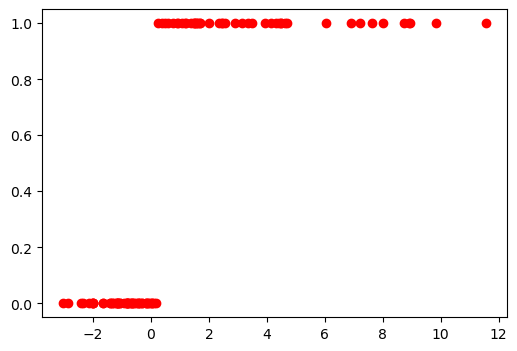

In [92]:
# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred = np.where(y_pred_score > 0.5, 1, y_pred_score)
y_pred = np.where(y_pred_score <= 0.5, 0, y_pred)

plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred, color='red', zorder=20)
plt.show()

C:\Users\tomas\AppData\Local\Temp\ipykernel_34456\2878094145.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta0 = float(log_reg.intercept_)
C:\Users\tomas\AppData\Local\Temp\ipykernel_34456\2878094145.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta1 = float(log_reg.coef_.ravel())


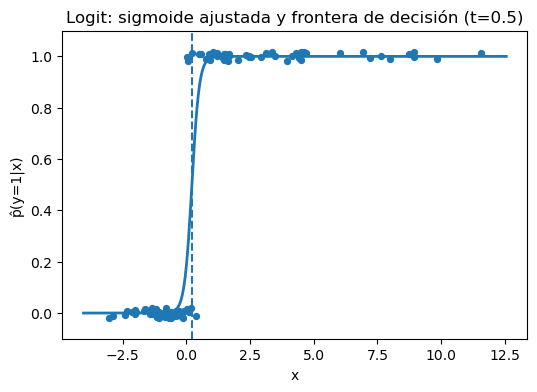

In [111]:
# Bloque 4bis — Sigmoide + frontera de decisión
beta0 = float(log_reg.intercept_)
beta1 = float(log_reg.coef_.ravel())

x_grid = np.linspace(X.min() - 1, X.max() + 1, 400).reshape(-1, 1)
p_grid = log_reg.predict_proba(x_grid)[:, 1]
x_star = -beta0 / beta1  # frontera para t=0.5

# Jitter para ver mejor los 0/1 en el scatter
jitter = (np.random.rand(len(y)) - 0.5) * 0.04

plt.figure(figsize=(6,4))
plt.scatter(X.ravel(), y + jitter, s=18, zorder=2)
plt.plot(x_grid, p_grid, linewidth=2, zorder=3)
plt.axvline(x_star, linestyle="--", linewidth=1.5, zorder=1)
plt.ylim(-0.1, 1.1)
plt.xlabel("x"); plt.ylabel("p̂(y=1|x)")
plt.title("Logit: sigmoide ajustada y frontera de decisión (t=0.5)")
plt.show()

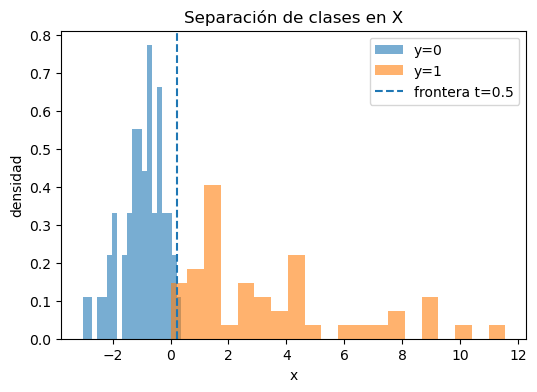

In [112]:
plt.figure(figsize=(6,4))
plt.hist(X[y==0].ravel(), bins=20, alpha=0.6, density=True, label="y=0")
plt.hist(X[y==1].ravel(), bins=20, alpha=0.6, density=True, label="y=1")
plt.axvline(x_star, linestyle="--", linewidth=1.5, label="frontera t=0.5")
plt.xlabel("x"); plt.ylabel("densidad"); plt.legend()
plt.title("Separación de clases en X")
plt.show()

col_0  0.0  1.0
row_0          
0.0     54    0
1.0      0   46


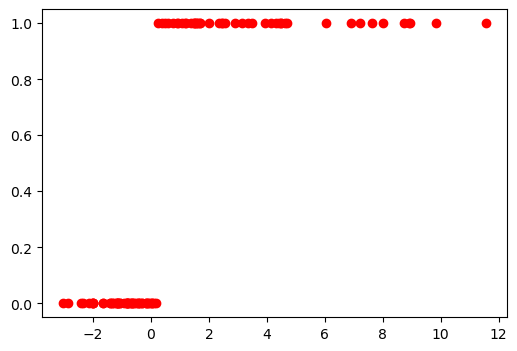

In [113]:
# Equivalente a lo anterior es usar predict() (clasifica en 0s y 1s)
y_pred_2 = log_reg.predict(X)
print(pd.crosstab(index=y_pred, columns=y_pred_2))

# Y graficamos los resultados
plt.figure(figsize=(6, 4))
plt.scatter(X, y_pred_2, color='red', zorder=20)
plt.show()

#### REGRESIÓN LOGÍSTICA CON STATSMODELS

In [114]:
# Podemos repetirlo con statsmodels
# Primero agregamos la columna de 1s y hacemos el ajuste
X_sm = sm.add_constant(X) 
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary2()) 
#print(result.summary2().as_latex())


Optimization terminated successfully.
         Current function value: 0.070883
         Iterations 12
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.897     
Date:               2025-10-13 14:14 AIC:              18.1766   
No. Observations:   100              BIC:              23.3869   
Df Model:           1                Log-Likelihood:   -7.0883   
Df Residuals:       98               LL-Null:          -69.135   
Converged:          1.0000           LLR p-value:      8.0400e-29
No. Iterations:     12.0000          Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -1.4736     0.7469   -1.9730   0.0485   -2.9376   -0.0097
x1         6.9142     2.6585    2.6008   0.0093    1.7038

### Medidas de precisión 

Dependiendo la prioridad del problema seguramente vamos a querer usar diferentes métricas. Scikit learn tiene muchas métricas que pueden explorar en el módulo [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- Sensitivity o Recall o True Positive Rate: TP rate = TP/P
- Specificity o True Negative Rate: 1 - FP rate = TN/N
- False Positive Rate o False Alarm Rate: FP rate = FP/N
- False Negative Rate: FN rate = FN/P
- Precision o Positive Predicted Value: TP/(TP+FP)
- Accuracy: (TP+TN)/(P+N)

Nota: Cuidado con las traducciones! "Accuracy" lo pueden encontrar traducido como "precisión" y eso puede generar confusión con la medida "precision" (o positive predicted value). Mi sugerencia es traducir "accuracy" como "exactitud".


[Matriz de confusión](https://www.unite.ai/what-is-a-confusion-matrix/)
<center>
<img src="https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png" width="1000">

</center>

In [115]:
matriz_confusion = confusion_matrix(y, y_pred)

print('Confusion Matrix:')
print(matriz_confusion) 
print('Accuracy Score:', accuracy_score(y, y_pred))

# Nota importante: en Python la matriz de confusión tiene:
# en las filas los valores ciertos
# y en las columnas los valores predichos

Confusion Matrix:
[[52  1]
 [ 2 45]]
Accuracy Score: 0.97


La matriz de confusión de sklearn pone en las filas las Y reales y las columnas las Y predichas. Muestra así los valores:

                               predicción
                         real   tn fp
                                fn tp

In [117]:
# Para los casos donde la predición (la y) es binaria podemos usar lo siguiente:
tn, fp , fn, tp = confusion_matrix(y, y_pred).ravel()   # Ravel transforma la matriz en un 1D array
# equivalente a: [tn, fp] , [fn, tp] = confusion_matrix(y, y_pred_2)

print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)

Verdadero 0:  52
Falso 1:  1
Falso 0:  2
Verdadero 1:  45


In [118]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %f' % accuracy)

# recall: tp / p = tp / (tp + fn)
recall = recall_score(y, y_pred)
print('Recall: %f' % recall)

Accuracy: 0.970000
Recall: 0.957447


### Curva ROC                  
ROC: Receiver Operating Characteristics
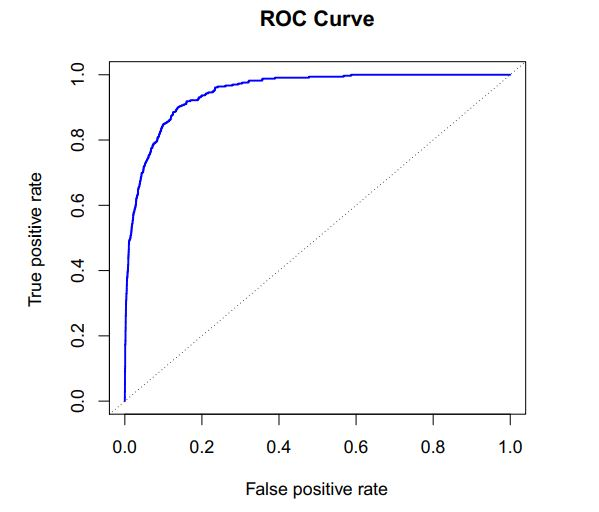

Veremos como utilizar las funciones:

-  [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve): computa la curva de ROC
- [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score): Computa el area bajo la curva de ROC de los scores predichos.
- [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay): Sirve para visualizar la curva de ROC. Con el mismo fin existe [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)

In [119]:
auc = roc_auc_score(y, y_pred_score_sm)
print('AUC: %.3f' % auc)

AUC: 0.997


In [120]:
fpr, tpr, thresholds = roc_curve(y, y_pred_score_sm)
np.set_printoptions(suppress = True) #If True, always print floating point numbers using fixed point notation, 
#                                     in which case numbers equal to zero in the current precision will print as zero. 
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

Thresholds: [       inf 1.         0.87687636 0.75606311 0.54176479 0.3128915
 0.24360811 0.21029903 0.19132368 0.        ]
FPR: [0.         0.         0.         0.01886792 0.01886792 0.05660377
 0.05660377 0.0754717  0.0754717  1.        ]
TPR: [0.         0.21276596 0.93617021 0.93617021 0.95744681 0.95744681
 0.9787234  0.9787234  1.         1.        ]


Ojo! Notar que Entre los umbrales hay uno que toma valor 2. El rango del umbral es de 0 a 1, ya que es una probabilidad. Pero scikit learn suma 1 al último valor en el array de thresholds (Notar que el anteúltimo umbral es 1, y el último es 2).

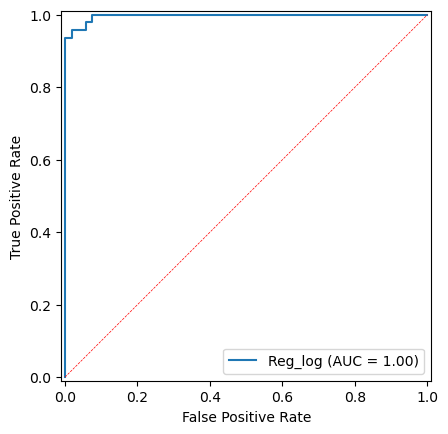

In [122]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show() 

#### Repitamos el ejercicio partiendo la base en train y test

In [123]:
# Entrenaremos con el 70% de la base de datos y el resto se usarán para testear 
# el modelo obtenido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [124]:
# Estimo:
# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression(penalty=None).fit(X_train, y_train)
y_test_pred_score = log_reg.predict_proba(X_test)[:,1]
y_test_pred = log_reg.predict(X_test)


In [125]:
# AUC y ROC
auc = roc_auc_score(y_test, y_test_pred_score)
print('AUC: %.4f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_score, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

AUC: 0.9952
Thresholds: [       inf 1.         1.         1.         0.99999891 0.99999557
 0.99973797 0.89600932 0.71390054 0.26850334 0.00887763 0.00151075
 0.00125343 0.00050419 0.00017821 0.00017337 0.00002216 0.00000826
 0.0000033  0.00000106 0.00000095 0.00000012 0.00000001 0.00000001
 0.         0.         0.        ]
FPR: [0.         0.         0.         0.         0.         0.
 0.         0.05263158 0.05263158 0.10526316 0.15789474 0.21052632
 0.26315789 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579
 0.57894737 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526
 0.89473684 0.94736842 1.        ]
TPR: [0.         0.45454545 0.54545455 0.63636364 0.72727273 0.81818182
 0.90909091 0.90909091 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


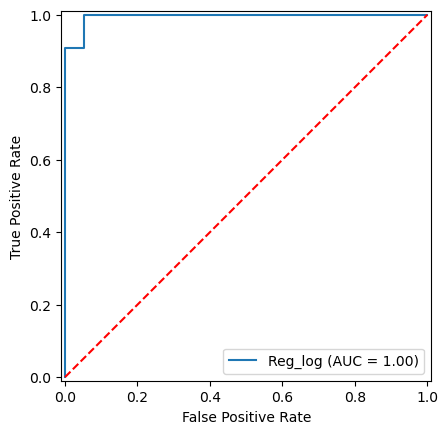

In [126]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

## K-Nearest Neighbors (KNN): idea y por qué es no paramétrico

Qué es  
KNN es un método simple de aprendizaje por instancias: para predecir la clase de un punto nuevo x*, busca sus K vecinos más cercanos en el set de entrenamiento y decide por mayoría (clasificación) o por promedio (regresión).

Regla básica  
1. Elegimos una métrica de distancia (euclídea por defecto).  
2. Elegimos un K.  
3. Tomamos los K puntos de entrenamiento más cercanos a x*.  
4. Clasificación: votan las clases de esos K vecinos. 

No hace supuestos de distribución  
- No asume normalidad, linealidad ni forma funcional.  
- La frontera de decisión se adapta a los datos localmente.  
- Por eso KNN es no paramétrico: no estima un conjunto fijo de parámetros globales como en logit; “aprende” guardando los datos y usando distancias.

Hiperparámetros clave  
- K: chico → modelo muy flexible, puede sobreajustar; grande → más suave, puede subajustar.  
- Distancia: euclídea, Manhattan, Minkowski, etc.  
- Ponderación: todos los vecinos valen igual o se pondera por 1/distancia.

Consideraciones prácticas  
- Escalado: imprescindible si las variables están en escalas distintas.  
- Dimensionalidad: con muchas variables las distancias pierden contraste (curse of dimensionality).  
- Costo computacional: entrenar es barato, predecir puede ser costoso si el dataset es grande, porque hay que buscar vecinos.



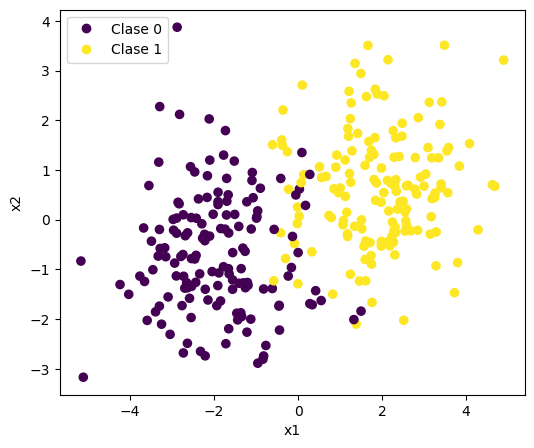

In [127]:


# Reproducibilidad
RANDOM_STATE = 42

# Generamos dos clústers con algo de superposición
X, y = make_blobs(
    n_samples=300,
    centers=[(-2, 0), (2, 0)],
    cluster_std=[1.2, 1.2],
    n_features=2,
    random_state=RANDOM_STATE
)

# (Opcional) pequeña rotación para que no quede perfectamente horizontal
theta = np.deg2rad(20)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
X = X @ R.T

# Armamos un DataFrame por si querés mirarlo
df = pd.DataFrame(X, columns=["x1", "x2"])
df["y"] = y

# Gráfico 2D coloreado por la clase y
plt.figure(figsize=(6, 5))
scatter = plt.scatter(df["x1"], df["x2"], c=df["y"], s=35)
plt.xlabel("x1")
plt.ylabel("x2")
# Leyenda simple
handles, _ = scatter.legend_elements()
plt.legend(handles, ["Clase 0", "Clase 1"], loc="best")
plt.show()

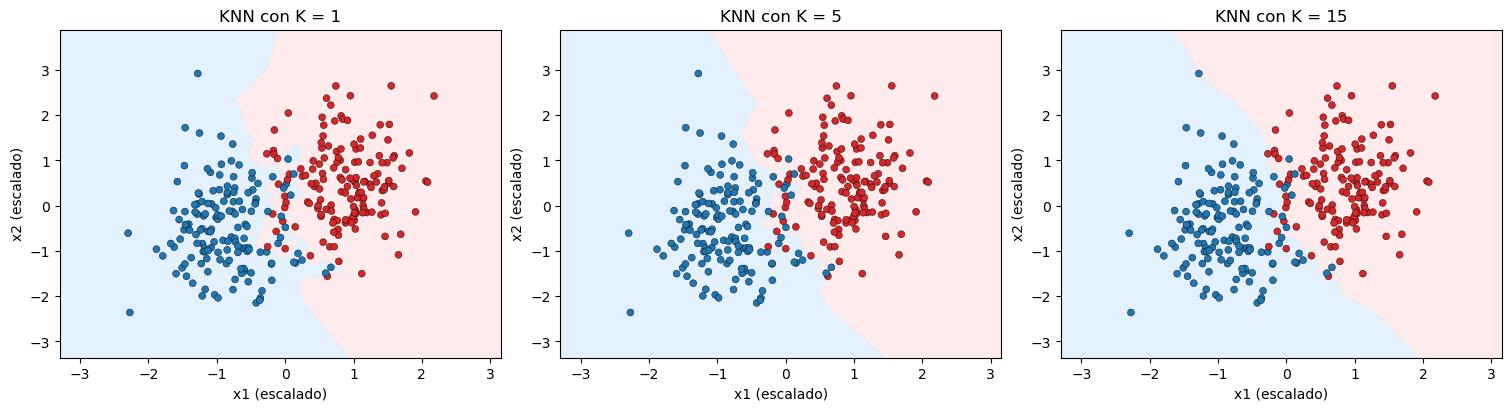

In [129]:
# Usamos X, y del bloque anterior
X_arr = X  # (n,2)
y_arr = y

# Escalado (muy importante para KNN)
scaler = StandardScaler().fit(X_arr)
X_scaled = scaler.transform(X_arr)

# Malla para pintar la frontera
h = 0.05
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Ks = [1, 5, 15]

fig, axes = plt.subplots(1, len(Ks), figsize=(5 * len(Ks), 4), constrained_layout=True)

# Colormaps (suaves)
cmap_bg = ListedColormap(["#ddeeff", "#ffe6e6"])
cmap_pts = ListedColormap(["#1f77b4", "#d62728"])

for ax, K in zip(axes, Ks):
    # Entrenar KNN
    knn = KNeighborsClassifier(n_neighbors=K, weights="uniform")
    knn.fit(X_scaled, y_arr)

    # Predicción sobre la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Fondo con la frontera
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_bg, levels=[-0.5, 0.5, 1.5])

    # Puntos de entrenamiento (en el espacio escalado)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_arr, cmap=cmap_pts, s=25, edgecolor="k", linewidth=0.3)

    ax.set_title(f"KNN con K = {K}")
    ax.set_xlabel("x1 (escalado)")
    ax.set_ylabel("x2 (escalado)")


plt.show()

Mejor K por accuracy CV: 25 | accuracy CV media = 0.957


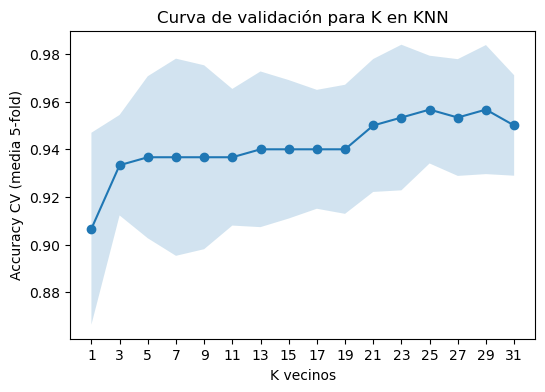

In [131]:
# Usamos X, y ya creados
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Ks = list(range(1, 32, 2))  # K impares para evitar empates
mean_scores = []
std_scores  = []

for K in Ks:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=K))
    ])
    scores = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy")
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

best_idx = int(np.argmax(mean_scores))
best_k = Ks[best_idx]
print(f"Mejor K por accuracy CV: {best_k} | accuracy CV media = {mean_scores[best_idx]:.3f}")

# Curva de validación
plt.figure(figsize=(6,4))
plt.plot(Ks, mean_scores, marker="o")
plt.fill_between(Ks,
                 np.array(mean_scores) - np.array(std_scores),
                 np.array(mean_scores) + np.array(std_scores),
                 alpha=0.2)
plt.xlabel("K vecinos")
plt.ylabel("Accuracy CV (media 5-fold)")
plt.title("Curva de validación para K en KNN")
plt.xticks(Ks)
plt.show()

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             roc_auc_score)
pipe_best = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])

# Predicciones out-of-fold para evaluar de forma honesta
y_pred_oof = cross_val_predict(pipe_best, X, y, cv=cv, method="predict")
# Probabilidades para AUC (si querés ROC luego)
y_proba_oof = cross_val_predict(pipe_best, X, y, cv=cv, method="predict_proba")[:,1]

cm   = confusion_matrix(y, y_pred_oof, labels=[1,0])
acc  = accuracy_score(y, y_pred_oof)
prec = precision_score(y, y_pred_oof)
rec  = recall_score(y, y_pred_oof)
auc  = roc_auc_score(y, y_proba_oof)

print(f"K={best_k} | Acc={acc:.3f} | Prec={prec:.3f} | Recall={rec:.3f} |  AUC={auc:.3f}\n")

print("\nClassification report:")
print(classification_report(y, y_pred_oof, digits=3))

# y_true, y_pred_oof ya definidos
# Usá el orden estándar [0, 1] para evitar confusiones
cm = confusion_matrix(y, y_pred_oof, labels=[0, 1])

cm_df = pd.DataFrame(
    cm,
    index=pd.Index(["True 0 (negativo)", "True 1 (positivo)"], name="Real"),
    columns=pd.Index(["Pred 0 (negativo)", "Pred 1 (positivo)"], name="Predicho"),
)
cm_df

K=25 | Acc=0.957 | Prec=0.948 | Recall=0.967 |  AUC=0.992


Classification report:
              precision    recall  f1-score   support

           0      0.966     0.947     0.956       150
           1      0.948     0.967     0.957       150

    accuracy                          0.957       300
   macro avg      0.957     0.957     0.957       300
weighted avg      0.957     0.957     0.957       300



Predicho,Pred 0 (negativo),Pred 1 (positivo)
Real,,
True 0 (negativo),142,8
True 1 (positivo),5,145
